In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [ ]:
auto_data = pd.read_csv('/content/train.csv')

In [ ]:
auto_data['color'].unique()

array(['чёрный', 'серебристый', 'белый', 'синий', 'серый', 'красный',
       'коричневый', 'зелёный', 'голубой', 'пурпурный', 'бежевый',
       'фиолетовый', 'оранжевый', 'золотистый', 'жёлтый', 'розовый'],
      dtype=object)

In [ ]:
auto_data.head()

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,time_of_ownership,vehicle_passport,type_of_drive,wheel
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,3.0 LTR,272 N12,бензин,245000,2007,5ER,...,599000.0,2007,1099980990,SEDAN AUTOMATIC 3.0,автоматическая,3 или более,NaN,Оригинал,полный,Левый
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",2.8 LTR,204 N12,бензин,183000,2011,A6,...,850000.0,2011,1095836906,SEDAN VARIATOR 2.8,вариатор,2 владельца,8 лет и 6 месяцев,Оригинал,передний,Левый
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,3.5 LTR,306 N12,бензин,122733,2009,E_KLASSE,...,1325000.0,2013,1100195530,SEDAN AUTOMATIC 3.5,автоматическая,3 или более,NaN,Оригинал,полный,Левый
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,2.0 LTR,180 N12,бензин,151000,2011,A6,...,815000.0,2011,1099880662,SEDAN VARIATOR 2.0,вариатор,3 или более,4 года и 9 месяцев,Оригинал,передний,Левый
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",1.8 LTR,160 N12,бензин,140000,2007,A5,...,810000.0,2011,1083244610,LIFTBACK VARIATOR 1.8,вариатор,3 или более,2 года и 9 месяцев,Оригинал,передний,Левый


In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              6682 non-null   object 
 1   brand                 6682 non-null   object 
 2   color                 6682 non-null   object 
 3   description           6682 non-null   object 
 4   engineDisplacement    6682 non-null   object 
 5   enginePower           6682 non-null   object 
 6   fuelType              6682 non-null   object 
 7   mileage               6682 non-null   int64  
 8   modelDate             6682 non-null   int64  
 9   model_info            6682 non-null   object 
 10  name                  6682 non-null   object 
 11  numberOfDoors         6682 non-null   int64  
 12  price                 6682 non-null   float64
 13  productionDate        6682 non-null   int64  
 14  sell_id               6682 non-null   int64  
 15  vehicleConfiguration 

In [ ]:
def change_params(value):
  if value == 'None':
    return 'Other'
  else:
    return value
auto_data['model_info'] = auto_data['model_info'].apply(change_params)

In [ ]:
auto_data.shape

(6682, 22)

In [ ]:
auto_data['wheel'].value_counts()

Левый     6680
Правый       2
Name: wheel, dtype: int64

In [ ]:
auto_data[auto_data['wheel'] == 'Правый']

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,time_of_ownership,vehicle_passport,type_of_drive,wheel
1107,купе,AUDI,красный,"Эксклюзивное авто, собрано в Японии. Правый ру...",1.8 LTR,180 N12,бензин,173160,2003,TT,...,450000.0,2004,1098344588,COUPE AUTOMATIC 1.8,автоматическая,3 или более,NaN,Дубликат,передний,Правый
1517,компактвэн,BMW,синий,"Продам автомобиль, сборка Мюнхен, Бавария, экс...",2.0 LTR,150 N12,дизель,43000,2015,2GRANDTOURER,...,1500000.0,2016,1091158456,COMPACTVAN AUTOMATIC 2.0,автоматическая,1 владелец,1 год и 3 месяца,Оригинал,передний,Правый


In [ ]:
auto_data.drop('time_of_ownership', axis = 1, inplace=True)

In [ ]:
auto_data[auto_data['owners'].isnull() == True]['sell_id']

4994    1019330519
Name: sell_id, dtype: int64

In [ ]:
auto_data.drop(index=4994, axis = 0, inplace = True)

In [ ]:
auto_data['owners'].unique()


array(['3 или более', '2\xa0владельца', '1\xa0владелец'], dtype=object)

In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6681 entries, 0 to 6681
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              6681 non-null   object 
 1   brand                 6681 non-null   object 
 2   color                 6681 non-null   object 
 3   description           6681 non-null   object 
 4   engineDisplacement    6681 non-null   object 
 5   enginePower           6681 non-null   object 
 6   fuelType              6681 non-null   object 
 7   mileage               6681 non-null   int64  
 8   modelDate             6681 non-null   int64  
 9   model_info            6681 non-null   object 
 10  name                  6681 non-null   object 
 11  numberOfDoors         6681 non-null   int64  
 12  price                 6681 non-null   float64
 13  productionDate        6681 non-null   int64  
 14  sell_id               6681 non-null   int64  
 15  vehicleConfiguration 

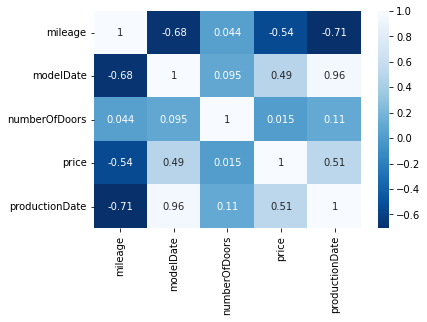

In [ ]:
sns.heatmap(auto_data.drop('sell_id', axis=1).corr(), annot=True, cmap = "Blues_r")
plt.rcParams['figure.figsize']=(10,10)

In [ ]:
price_changes = auto_data.groupby(by='modelDate')['price'].mean()

In [ ]:
auto_data[auto_data['modelDate'] == 1988]

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
1734,седан,BMW,чёрный,Бмв м5 е34 делал для себя 90 % новых запчастей...,3.8 LTR,340 N12,бензин,40000,1988,M5,...,4,2500000.0,1992,1067642798,SEDAN MECHANICAL 3.8,механическая,2 владельца,Оригинал,задний,Левый
2496,родстер,BMW,чёрный,Год выпуска: 1990. Пробег: 190 000 км. Кузов: ...,2.5 LTR,170 N12,бензин,190000,1988,Z1,...,2,2500000.0,1990,1085177776,ROADSTER MECHANICAL 2.5,механическая,2 владельца,Оригинал,задний,Левый


In [ ]:
price_changes

modelDate
1975    5.900000e+05
1976    1.700000e+06
1977    9.150000e+05
1979    9.750000e+05
1981    1.404995e+06
1982    6.026000e+05
1984    6.587500e+05
1985    1.662500e+06
1986    5.000000e+05
1987    9.096634e+05
1988    2.500000e+06
1989    9.500000e+05
1990    1.157775e+06
1991    7.833333e+05
1992    1.396077e+06
1994    1.779304e+06
1995    4.948235e+05
1996    6.121818e+05
1997    3.928461e+05
1998    8.948168e+05
1999    5.794659e+05
2000    6.697213e+05
2001    6.348197e+05
2002    7.362723e+05
2003    8.851220e+05
2004    5.348374e+05
2005    7.635019e+05
2006    8.845554e+05
2007    8.538573e+05
2008    9.359584e+05
2009    1.201042e+06
2010    1.558647e+06
2011    1.202927e+06
2012    1.831588e+06
2013    2.235747e+06
2014    2.997856e+06
2015    3.214986e+06
2016    2.870783e+06
2017    4.696908e+06
2018    4.810466e+06
2019    6.173135e+06
Name: price, dtype: float64

In [ ]:
price_changes = pd.DataFrame({'modelDate': price_changes.index, 'price': price_changes.values})

In [ ]:
price_changes

,modelDate,price
0,1975,5.900000e+05
1,1976,1.700000e+06
2,1977,9.150000e+05
3,1979,9.750000e+05
4,1981,1.404995e+06
5,1982,6.026000e+05
6,1984,6.587500e+05
7,1985,1.662500e+06
8,1986,5.000000e+05
9,1987,9.096634e+05


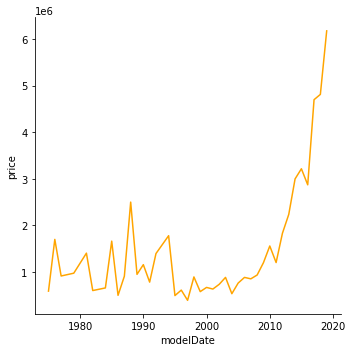

In [ ]:
sns.relplot(data=price_changes, x='modelDate', y='price', kind='line', color='orange');

In [ ]:
fig = px.line(price_changes, x="modelDate", y="price", title='Изменение средней цены на автомобили со временем')
fig.show()


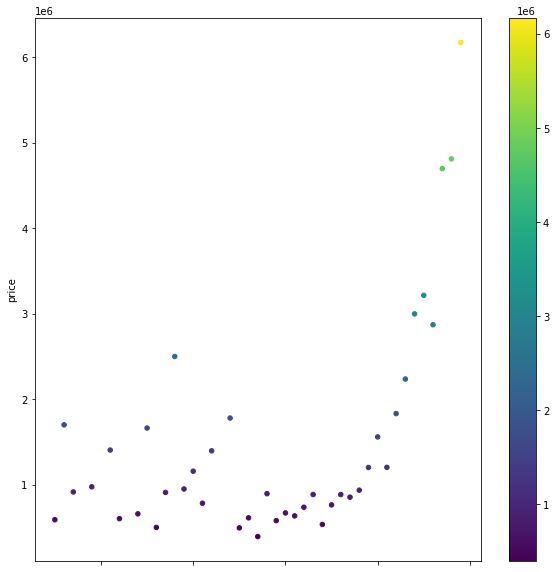

In [ ]:
price_changes.plot(
    kind='scatter',
    x='modelDate',
    y='price',
    c=price_changes['price'],
    colormap='viridis',
    figsize=(10, 10)

);

In [ ]:
auto_data[auto_data['price'] > 6000000]

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
49,седан,MERCEDES,чёрный,"Состояние нового авто!\r\nБез ДТП, в родной кр...",4.0 LTR,469 N12,бензин,58000,2017,S_CLASS_MAYBACH,...,4,9500000.0,2018,1098741526,SEDAN AUTOMATIC 4.0,автоматическая,1 владелец,Оригинал,полный,Левый
59,внедорожник 5 дв.,MERCEDES,чёрный,Автомобили Mercedes-Benz из внутреннего парка....,4.7 LTR,455 N12,бензин,47100,2015,GLS_KLASSE,...,5,6577900.0,2019,1099912174,ALLROAD_5_DOORS AUTOMATIC 4.7,автоматическая,1 владелец,Оригинал,полный,Левый
66,купе,MERCEDES,серый,Автомобиль был куплен 21 ноября 2018 года в Па...,3.0 LTR,367 N12,бензин,25000,2017,S_KLASSE,...,2,6900000.0,2018,1099336686,COUPE AUTOMATIC 3.0,автоматическая,2 владельца,Оригинал,полный,Левый
69,внедорожник 5 дв.,BMW,синий,Автомобиль из демонстрационного парка по спец ...,3.0 LTR,400 N12,дизель,15,2018,X5,...,5,8239821.0,2020,1098590228,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый
108,седан,MERCEDES,чёрный,Автомобили Mercedes-Benz из внутреннего парка....,3.0 LTR,367 N12,бензин,13638,2017,S_CLASS_MAYBACH,...,4,7605250.0,2019,1095902152,SEDAN AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,седан,BMW,чёрный,Автомобиль продаётся официальным дилером BMW -...,3.0 LTR,400 N12,дизель,31,2019,7ER,...,4,11260000.0,2019,1096736180,SEDAN AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый
6586,внедорожник 5 дв.,MERCEDES,синий,Выгода до 82 000 руб. при обмене на Ваш автомо...,4.0 LTR,422 N12,бензин,12596,2015,G_KLASSE,...,5,6098000.0,2016,1099620352,ALLROAD_5_DOORS AUTOMATIC 4.0,автоматическая,1 владелец,Оригинал,полный,Левый
6592,седан,MERCEDES,чёрный,"Авто новое, пробег 2200км\r\nПродаю за ненадоб...",4.0 LTR,612 N12,бензин,2200,2016,E_KLASSE_AMG,...,4,6700000.0,2019,1095664658,SEDAN AUTOMATIC 4.0,автоматическая,1 владелец,Оригинал,полный,Левый
6613,минивэн,MERCEDES,синий,Подобного автомобиля на рынке не существует ! ...,2.1 LTR,190 N12,дизель,54800,2014,V_KLASSE,...,5,6950000.0,2015,1099105217,MINIVAN AUTOMATIC 2.1,автоматическая,2 владельца,Оригинал,полный,Левый


In [ ]:
auto_data[auto_data['modelDate'] == 2019]

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
40,седан,BMW,чёрный,Автомобиль проходит по программе - BMW Premium...,3.0 LTR,249 N12,дизель,31,2019,7ER,...,4,5950000.0,2020,1100163226,SEDAN AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый
135,внедорожник 5 дв.,MERCEDES,чёрный,"Автомобиль скоро в продаже!\r\nПожалуйста, пол...",3.0 LTR,435 N12,бензин,1277,2019,GLE_KLASSE_COUPE_AMG,...,5,9500000.0,2020,1100249220,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый
673,седан,BMW,чёрный,"Я первый хозяин, в птс вписан дилер. Машину по...",2.0 LTR,249 N12,бензин,7500,2019,7ER,...,4,5190000.0,2019,1098473852,SEDAN AUTOMATIC 2.0,автоматическая,2 владельца,Оригинал,задний,Левый
727,седан,MERCEDES,серый,"CLA Сlass, c хорошим внешним и внутренним стай...",1.3 LTR,150 N12,бензин,19000,2019,CLA_KLASSE,...,4,2730000.0,2019,1095293074,SEDAN ROBOT 1.3,роботизированная,1 владелец,Оригинал,передний,Левый
918,седан,MERCEDES,серый,Комфорт: 13. Безопасность: 10. Салон: 8. Обзор...,1.3 LTR,150 N12,бензин,16466,2019,CLA_KLASSE,...,4,2249000.0,2019,1099730748,SEDAN ROBOT 1.3,роботизированная,2 владельца,Оригинал,передний,Левый
1042,седан,MERCEDES,чёрный,"Машина в идеальном состоянии,вся в пленке Сант...",1.3 LTR,150 N12,бензин,15000,2019,CLA_KLASSE,...,4,2300000.0,2019,1099427846,SEDAN ROBOT 1.3,роботизированная,1 владелец,Оригинал,передний,Левый
1092,седан,BMW,чёрный,РОЛЬФ Премиум – крупнейший официальный дилер М...,4.4 LTR,530 N12,бензин,8929,2019,7ER,...,4,7159000.0,2019,1099106379,SEDAN AUTOMATIC 4.4,автоматическая,1 владелец,Оригинал,полный,Левый
1288,внедорожник 5 дв.,BMW,чёрный,X6 NEW / X6 xDrive30d\t\r\n\r\n\r\n\r\n ...,3.0 LTR,249 N12,дизель,3,2019,X6,...,5,6770000.0,2020,1098272978,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый
1299,внедорожник 5 дв.,MERCEDES,чёрный,ПРОДАЕТСЯ НОВЫЙ АВТОМОБИЛЬ !!! КОМПЛЕКТАЦИЯ - ...,2.9 LTR,330 N12,дизель,78,2019,GLS_KLASSE,...,5,9050000.0,2020,1099782882,ALLROAD_5_DOORS AUTOMATIC 2.9,автоматическая,1 владелец,Оригинал,полный,Левый
1502,седан,BMW,синий,Автомобиль из собственного парка компании АВТО...,1.5 LTR,140 N12,бензин,2074,2019,2ER,...,4,2258999.0,2020,1096964514,SEDAN ROBOT 1.5,роботизированная,1 владелец,Оригинал,передний,Левый


In [ ]:
price_max = auto_data.groupby(by='modelDate')['price'].max()

In [ ]:
price_max #1998 1987 1985 2000 2003 2008 2018

modelDate
1975      590000.0
1976     1700000.0
1977      930000.0
1979     1500000.0
1981     2450000.0
1982      800000.0
1984     1000000.0
1985     3500000.0
1986      500000.0
1987     3333333.0
1988     2500000.0
1989      950000.0
1990     2100000.0
1991      950000.0
1992     4500000.0
1994     5450000.0
1995     1300000.0
1996     2500000.0
1997      730000.0
1998     8000000.0
1999     2000000.0
2000    14000000.0
2001     4300000.0
2002     6620000.0
2003    23900000.0
2004     2100000.0
2005     5500000.0
2006     4700000.0
2007     5300000.0
2008    12000000.0
2009     4950000.0
2010    21000000.0
2011     3768000.0
2012     8000000.0
2013    22600000.0
2014    23000000.0
2015    15000000.0
2016     9900650.0
2017    13110555.0
2018    18700000.0
2019    12900000.0
Name: price, dtype: float64

In [ ]:
auto_data[(auto_data['modelDate'] == 2018) & (auto_data['price'] == 18700000.0)]

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
2721,внедорожник 5 дв.,MERCEDES,чёрный,Новый авто!! В наличии! Максимальной комплекта...,4.0 LTR,585 N12,бензин,17,2018,G_KLASSE_AMG,...,5,18700000.0,2020,1099459954,ALLROAD_5_DOORS AUTOMATIC 4.0,автоматическая,1 владелец,Оригинал,полный,Левый


In [ ]:
auto_data.describe()

,mileage,modelDate,numberOfDoors,price,productionDate,sell_id
count,6681.000000,6681.000000,6681.000000,6.681000e+03,6681.000000,6.681000e+03
mean,120516.701991,2010.137255,4.268523,1.900063e+06,2012.033229,1.096601e+09
std,81459.112729,5.369647,0.878747,1.914230e+06,5.048250,2.652261e+07
min,1.000000,1975.000000,2.000000,3.013010e+05,1982.000000,3.421294e+07
25%,59144.000000,2007.000000,4.000000,8.000000e+05,2009.000000,1.097110e+09
50%,111000.000000,2011.000000,4.000000,1.300000e+06,2013.000000,1.099407e+09
75%,168000.000000,2014.000000,5.000000,2.299711e+06,2016.000000,1.099973e+09
max,999999.000000,2019.000000,5.000000,2.390000e+07,2020.000000,1.100273e+09


In [ ]:
average_miles = auto_data.groupby(by='modelDate')['mileage'].mean()
average_miles

modelDate
1975    180000.000000
1976    339000.000000
1977    122140.000000
1979    196333.333333
1981     60250.000000
1982    194880.000000
1984    262703.250000
1985    224250.000000
1986    103000.000000
1987    184569.900000
1988    115000.000000
1989    186000.000000
1990    267300.025000
1991    244000.000000
1992    198316.153846
1994    188007.173913
1995    256026.235294
1996    305927.272727
1997    256289.461538
1998    205145.813953
1999    261371.681818
2000    266134.442623
2001    234638.934426
2002    221994.621622
2003    238719.107143
2004    199557.955665
2005    185901.576779
2006    178244.379433
2007    157680.624113
2008    154183.485523
2009    142316.851429
2010    132324.496988
2011    116761.205837
2012    105687.067416
2013     91041.845361
2014     67502.020873
2015     57969.714552
2016     52159.846154
2017     26455.516667
2018     14084.989796
2019      6128.896552
Name: mileage, dtype: float64

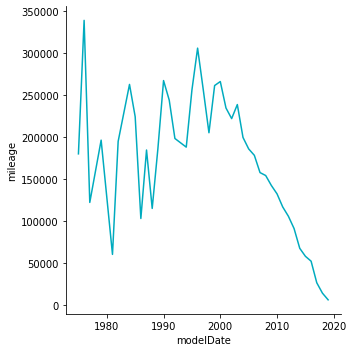

In [ ]:
average_miles = pd.DataFrame({'modelDate': average_miles.index, 'mileage': average_miles.values})
sns.relplot(data=average_miles, x='modelDate', y='mileage', kind='line', color='#00abbf');

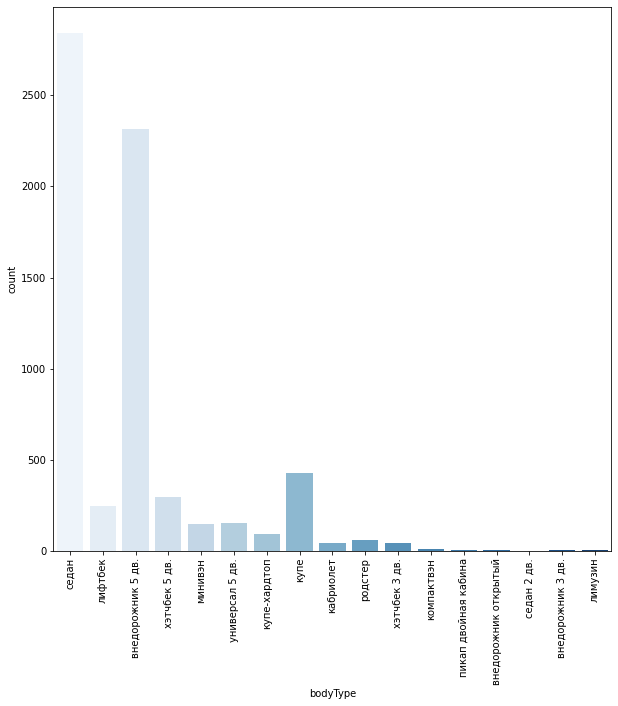

In [ ]:
ax = sns.countplot(data=auto_data, x='bodyType', palette = "Blues");
plt.rcParams['figure.figsize']=(10,4)
plt.tight_layout #седан внедорожник купе
ax.xaxis.set_tick_params(rotation=90)
fig = ax.get_figure()
fig.savefig('count.png')

In [ ]:
px.bar(auto_data, x='bodyType', color='vehicle_passport')


In [ ]:
auto_data[auto_data['bodyType'] == 'седан'].describe()

,mileage,modelDate,numberOfDoors,price,productionDate,sell_id
count,2842.000000,2842.000000,2842.0,2.842000e+03,2842.000000,2.842000e+03
mean,127215.053483,2009.991907,4.0,1.629225e+06,2011.775862,1.096430e+09
std,80888.007100,5.675392,0.0,1.536168e+06,5.463978,2.873285e+07
min,10.000000,1977.000000,4.0,3.013010e+05,1982.000000,3.421294e+07
25%,69000.000000,2007.000000,4.0,7.092500e+05,2009.000000,1.096924e+09
50%,118700.000000,2011.000000,4.0,1.199000e+06,2013.000000,1.099371e+09
75%,175000.000000,2014.000000,4.0,1.900000e+06,2016.000000,1.099962e+09
max,542000.000000,2019.000000,4.0,2.260000e+07,2020.000000,1.100273e+09


In [ ]:
auto_data.head()

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,3.0 LTR,272 N12,бензин,245000,2007,5ER,...,4,599000.0,2007,1099980990,SEDAN AUTOMATIC 3.0,автоматическая,3 или более,Оригинал,полный,Левый
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",2.8 LTR,204 N12,бензин,183000,2011,A6,...,4,850000.0,2011,1095836906,SEDAN VARIATOR 2.8,вариатор,2 владельца,Оригинал,передний,Левый
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,3.5 LTR,306 N12,бензин,122733,2009,E_KLASSE,...,4,1325000.0,2013,1100195530,SEDAN AUTOMATIC 3.5,автоматическая,3 или более,Оригинал,полный,Левый
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,2.0 LTR,180 N12,бензин,151000,2011,A6,...,4,815000.0,2011,1099880662,SEDAN VARIATOR 2.0,вариатор,3 или более,Оригинал,передний,Левый
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",1.8 LTR,160 N12,бензин,140000,2007,A5,...,5,810000.0,2011,1083244610,LIFTBACK VARIATOR 1.8,вариатор,3 или более,Оригинал,передний,Левый


In [ ]:
auto_data['brand'].unique()

array(['BMW', 'AUDI', 'MERCEDES'], dtype=object)

In [ ]:
auto_data['fuelType'].value_counts()

бензин     4803
дизель     1861
гибрид       12
электро       5
Name: fuelType, dtype: int64

In [ ]:
auto_data[auto_data['fuelType'] == 'электро']

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
2296,хэтчбек 5 дв.,BMW,чёрный,"Автомобиль в наличии Москве , с ПТС , производ...",undefined LTR,184 N12,электро,9000,2017,I3,...,5,2719000.0,2019,1100083262,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый
3725,хэтчбек 5 дв.,BMW,чёрный,"BMW i3 Электромобиль с бензиновым генератором,...",undefined LTR,170 N12,электро,39500,2017,I3,...,5,2299711.0,2017,1098041130,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый
3726,хэтчбек 5 дв.,BMW,голубой,Прибыло из Америки в августе 20 года. Полная и...,undefined LTR,170 N12,электро,28800,2017,I3,...,5,2170000.0,2017,1100097316,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый
5862,хэтчбек 5 дв.,BMW,белый,В наличии! Автомобиль куплен в США! Комплектац...,undefined LTR,170 N12,электро,35810,2013,I3,...,5,1690000.0,2016,1100153696,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый
6283,хэтчбек 5 дв.,BMW,чёрный,Авто в идеальном состоянии\r\nЕсть REX (range ...,undefined LTR,170 N12,электро,60000,2013,I3,...,5,1790000.0,2015,1097395090,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый


In [ ]:
auto_data['color'].unique()

array(['чёрный', 'серебристый', 'белый', 'синий', 'серый', 'красный',
       'коричневый', 'зелёный', 'голубой', 'пурпурный', 'бежевый',
       'фиолетовый', 'оранжевый', 'золотистый', 'жёлтый', 'розовый'],
      dtype=object)

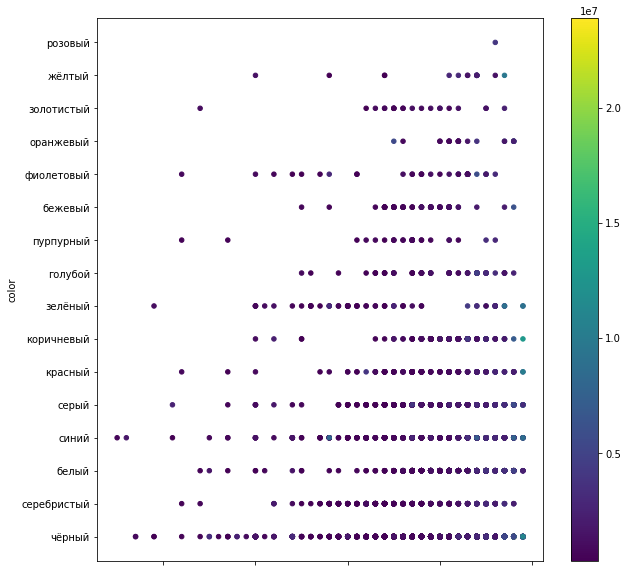

In [ ]:
auto_data.plot(
    kind='scatter',
    x='modelDate',
    y='color',
    c=auto_data['price'],
    colormap='viridis',
    figsize=(10, 10)

);

In [ ]:
auto_data[auto_data['color'] == 'розовый']

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
5532,седан,BMW,розовый,Здравствуйте! \r\nПродаю свой автомобиль. Я ед...,3.0 LTR,400 N12,дизель,80000,2016,5ER,...,4,4000000.0,2018,1090081570,SEDAN AUTOMATIC 3.0,автоматическая,1 владелец,Оригинал,полный,Левый


In [ ]:
auto_data.groupby('color')['price'].max()

color
бежевый         6250000.0
белый          13110555.0
голубой         5199900.0
жёлтый          9700000.0
зелёный         9000000.0
золотистый      2719000.0
коричневый     21000000.0
красный        10200000.0
оранжевый       7800000.0
пурпурный       3300000.0
розовый         4000000.0
серебристый    14000000.0
серый          23900000.0
синий          13777000.0
фиолетовый      6800000.0
чёрный         23000000.0
Name: price, dtype: float64

In [ ]:
auto_data.groupby('bodyType')['price'].max()

bodyType
внедорожник 3 дв.        1800000.0
внедорожник 5 дв.       18700000.0
внедорожник открытый     2900000.0
кабриолет               14000000.0
компактвэн               1699999.0
купе                    23900000.0
купе-хардтоп             4700000.0
лимузин                  8000000.0
лифтбек                 12253000.0
минивэн                 23000000.0
пикап двойная кабина     4100000.0
родстер                 21000000.0
седан                   22600000.0
седан 2 дв.               590000.0
универсал 5 дв.          5999000.0
хэтчбек 3 дв.            1500000.0
хэтчбек 5 дв.            2819000.0
Name: price, dtype: float64

In [ ]:
auto_data

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,3.0 LTR,272 N12,бензин,245000,2007,5ER,...,4,599000.0,2007,1099980990,SEDAN AUTOMATIC 3.0,автоматическая,3 или более,Оригинал,полный,Левый
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",2.8 LTR,204 N12,бензин,183000,2011,A6,...,4,850000.0,2011,1095836906,SEDAN VARIATOR 2.8,вариатор,2 владельца,Оригинал,передний,Левый
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,3.5 LTR,306 N12,бензин,122733,2009,E_KLASSE,...,4,1325000.0,2013,1100195530,SEDAN AUTOMATIC 3.5,автоматическая,3 или более,Оригинал,полный,Левый
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,2.0 LTR,180 N12,бензин,151000,2011,A6,...,4,815000.0,2011,1099880662,SEDAN VARIATOR 2.0,вариатор,3 или более,Оригинал,передний,Левый
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",1.8 LTR,160 N12,бензин,140000,2007,A5,...,5,810000.0,2011,1083244610,LIFTBACK VARIATOR 1.8,вариатор,3 или более,Оригинал,передний,Левый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,седан,BMW,серый,Продаётся любимый автомобиль! За годы эксплуат...,2.0 LTR,150 N12,бензин,232777,2005,3ER,...,4,550000.0,2006,1100036650,SEDAN AUTOMATIC 2.0,автоматическая,3 или более,Оригинал,задний,Левый
6678,седан,BMW,чёрный,Куплена у официального дилера в 2017 г. \r\n\r...,2.0 LTR,190 N12,дизель,33700,2013,5ER,...,4,1900000.0,2016,1090506038,SEDAN AUTOMATIC 2.0,автоматическая,3 или более,Оригинал,задний,Левый
6679,седан,BMW,белый,Торг на месте. Все работает. Сборка немецкая. ...,2.0 LTR,143 N12,бензин,200000,2008,3ER,...,4,530000.0,2008,1095155628,SEDAN AUTOMATIC 2.0,автоматическая,3 или более,Оригинал,задний,Левый
6680,седан,AUDI,чёрный,Автомобиль в отличном состоянии.\r\n3-из Авто ...,3.0 LTR,310 N12,бензин,72000,2013,A8,...,4,1970000.0,2016,1099625256,SEDAN AUTOMATIC 3.0,автоматическая,3 или более,Оригинал,полный,Левый


In [ ]:
auto_data['engineDisplacement'].value_counts()

2.0 LTR          1929
3.0 LTR          1862
1.8 LTR           329
1.6 LTR           327
4.4 LTR           260
5.5 LTR           227
3.5 LTR           208
2.5 LTR           203
2.1 LTR           181
4.0 LTR           121
4.7 LTR           109
2.8 LTR            89
1.4 LTR            82
4.2 LTR            79
1.5 LTR            61
5.0 LTR            60
3.2 LTR            49
2.2 LTR            44
2.9 LTR            43
4.8 LTR            41
3.1 LTR            39
2.4 LTR            38
6.2 LTR            31
1.3 LTR            30
6.0 LTR            30
5.4 LTR            27
1.2 LTR            26
2.7 LTR            22
4.1 LTR            19
3.6 LTR            18
3.7 LTR            11
1.7 LTR            11
5.2 LTR            10
5.9 LTR            10
2.6 LTR             7
4.6 LTR             5
0.7 LTR             5
2.3 LTR             5
undefined LTR       5
1.9 LTR             4
6.6 LTR             4
3.4 LTR             4
5.6 LTR             3
4.3 LTR             3
5.8 LTR             3
6.3 LTR   

In [ ]:
auto_data[auto_data['engineDisplacement'] == 'undefined LTR']

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
2296,хэтчбек 5 дв.,BMW,чёрный,"Автомобиль в наличии Москве , с ПТС , производ...",undefined LTR,184 N12,электро,9000,2017,I3,...,5,2719000.0,2019,1100083262,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый
3725,хэтчбек 5 дв.,BMW,чёрный,"BMW i3 Электромобиль с бензиновым генератором,...",undefined LTR,170 N12,электро,39500,2017,I3,...,5,2299711.0,2017,1098041130,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый
3726,хэтчбек 5 дв.,BMW,голубой,Прибыло из Америки в августе 20 года. Полная и...,undefined LTR,170 N12,электро,28800,2017,I3,...,5,2170000.0,2017,1100097316,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый
5862,хэтчбек 5 дв.,BMW,белый,В наличии! Автомобиль куплен в США! Комплектац...,undefined LTR,170 N12,электро,35810,2013,I3,...,5,1690000.0,2016,1100153696,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый
6283,хэтчбек 5 дв.,BMW,чёрный,Авто в идеальном состоянии\r\nЕсть REX (range ...,undefined LTR,170 N12,электро,60000,2013,I3,...,5,1790000.0,2015,1097395090,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,Оригинал,задний,Левый


In [ ]:
auto_data.drop('vehicleConfiguration', axis=1, inplace=True)

In [ ]:
auto_data

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,3.0 LTR,272 N12,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,автоматическая,3 или более,Оригинал,полный,Левый
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",2.8 LTR,204 N12,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,вариатор,2 владельца,Оригинал,передний,Левый
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,3.5 LTR,306 N12,бензин,122733,2009,E_KLASSE,350 3.5 AT (306 л.с.) 4WD,4,1325000.0,2013,1100195530,автоматическая,3 или более,Оригинал,полный,Левый
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,2.0 LTR,180 N12,бензин,151000,2011,A6,2.0 CVT (180 л.с.),4,815000.0,2011,1099880662,вариатор,3 или более,Оригинал,передний,Левый
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",1.8 LTR,160 N12,бензин,140000,2007,A5,1.8 CVT (160 л.с.),5,810000.0,2011,1083244610,вариатор,3 или более,Оригинал,передний,Левый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,седан,BMW,серый,Продаётся любимый автомобиль! За годы эксплуат...,2.0 LTR,150 N12,бензин,232777,2005,3ER,320i 2.0 AT (150 л.с.),4,550000.0,2006,1100036650,автоматическая,3 или более,Оригинал,задний,Левый
6678,седан,BMW,чёрный,Куплена у официального дилера в 2017 г. \r\n\r...,2.0 LTR,190 N12,дизель,33700,2013,5ER,520d 2.0d AT (190 л.с.),4,1900000.0,2016,1090506038,автоматическая,3 или более,Оригинал,задний,Левый
6679,седан,BMW,белый,Торг на месте. Все работает. Сборка немецкая. ...,2.0 LTR,143 N12,бензин,200000,2008,3ER,318i 2.0 AT (143 л.с.),4,530000.0,2008,1095155628,автоматическая,3 или более,Оригинал,задний,Левый
6680,седан,AUDI,чёрный,Автомобиль в отличном состоянии.\r\n3-из Авто ...,3.0 LTR,310 N12,бензин,72000,2013,A8,Long 3.0 AT (310 л.с.) 4WD,4,1970000.0,2016,1099625256,автоматическая,3 или более,Оригинал,полный,Левый


In [ ]:
def engine(value):
  if value != 'undefined LTR':
    new_value = float(value[0:3])
  else:
    new_value = 0.0
  return new_value
auto_data['engine_v'] = auto_data['engineDisplacement'].apply(engine)

In [ ]:
auto_data

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,...,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel,engine_v
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,3.0 LTR,272 N12,бензин,245000,2007,5ER,...,4,599000.0,2007,1099980990,автоматическая,3 или более,Оригинал,полный,Левый,3.0
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",2.8 LTR,204 N12,бензин,183000,2011,A6,...,4,850000.0,2011,1095836906,вариатор,2 владельца,Оригинал,передний,Левый,2.8
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,3.5 LTR,306 N12,бензин,122733,2009,E_KLASSE,...,4,1325000.0,2013,1100195530,автоматическая,3 или более,Оригинал,полный,Левый,3.5
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,2.0 LTR,180 N12,бензин,151000,2011,A6,...,4,815000.0,2011,1099880662,вариатор,3 или более,Оригинал,передний,Левый,2.0
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",1.8 LTR,160 N12,бензин,140000,2007,A5,...,5,810000.0,2011,1083244610,вариатор,3 или более,Оригинал,передний,Левый,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,седан,BMW,серый,Продаётся любимый автомобиль! За годы эксплуат...,2.0 LTR,150 N12,бензин,232777,2005,3ER,...,4,550000.0,2006,1100036650,автоматическая,3 или более,Оригинал,задний,Левый,2.0
6678,седан,BMW,чёрный,Куплена у официального дилера в 2017 г. \r\n\r...,2.0 LTR,190 N12,дизель,33700,2013,5ER,...,4,1900000.0,2016,1090506038,автоматическая,3 или более,Оригинал,задний,Левый,2.0
6679,седан,BMW,белый,Торг на месте. Все работает. Сборка немецкая. ...,2.0 LTR,143 N12,бензин,200000,2008,3ER,...,4,530000.0,2008,1095155628,автоматическая,3 или более,Оригинал,задний,Левый,2.0
6680,седан,AUDI,чёрный,Автомобиль в отличном состоянии.\r\n3-из Авто ...,3.0 LTR,310 N12,бензин,72000,2013,A8,...,4,1970000.0,2016,1099625256,автоматическая,3 или более,Оригинал,полный,Левый,3.0


In [ ]:
auto_data['engine_v'] = auto_data.engine_v.apply(lambda x: auto_data['engine_v'].mean() if x == 0.0 else x)

In [ ]:
auto_data['engine_v'].unique()

array([3.        , 2.8       , 3.5       , 2.        , 1.8       ,
       5.5       , 2.5       , 1.6       , 1.5       , 4.8       ,
       4.4       , 3.8       , 2.2       , 4.        , 2.1       ,
       2.4       , 4.7       , 1.2       , 3.6       , 3.1       ,
       0.7       , 6.        , 4.1       , 5.        , 5.4       ,
       6.2       , 4.2       , 1.4       , 2.9       , 1.7       ,
       3.2       , 2.7       , 1.9       , 1.3       , 5.2       ,
       3.7       , 5.9       , 4.9       , 2.3       , 6.6       ,
       3.4       , 6.3       , 2.6       , 2.78194881, 5.6       ,
       4.3       , 4.6       , 5.8       ])

In [ ]:
auto_data.drop('engineDisplacement', axis=1, inplace=True)

In [ ]:
auto_data.head()

,bodyType,brand,color,description,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel,engine_v
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,272 N12,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,автоматическая,3 или более,Оригинал,полный,Левый,3.0
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",204 N12,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,вариатор,2 владельца,Оригинал,передний,Левый,2.8
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,306 N12,бензин,122733,2009,E_KLASSE,350 3.5 AT (306 л.с.) 4WD,4,1325000.0,2013,1100195530,автоматическая,3 или более,Оригинал,полный,Левый,3.5
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,180 N12,бензин,151000,2011,A6,2.0 CVT (180 л.с.),4,815000.0,2011,1099880662,вариатор,3 или более,Оригинал,передний,Левый,2.0
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",160 N12,бензин,140000,2007,A5,1.8 CVT (160 л.с.),5,810000.0,2011,1083244610,вариатор,3 или более,Оригинал,передний,Левый,1.8


In [ ]:
auto_data['enginePower'].unique()

array(['272 N12', '204 N12', '306 N12', '180 N12', '160 N12', '184 N12',
       '197 N12', '326 N12', '190 N12', '245 N12', '224 N12', '585 N12',
       '211 N12', '225 N12', '218 N12', '156 N12', '231 N12', '238 N12',
       '140 N12', '150 N12', '360 N12', '122 N12', '555 N12', '249 N12',
       '95 N12', '136 N12', '163 N12', '407 N12', '469 N12', '388 N12',
       '544 N12', '177 N12', '170 N12', '455 N12', '105 N12', '280 N12',
       '367 N12', '340 N12', '400 N12', '233 N12', '265 N12', '450 N12',
       '333 N12', '290 N12', '300 N12', '192 N12', '143 N12', '390 N12',
       '269 N12', '408 N12', '240 N12', '200 N12', '320 N12', '258 N12',
       '435 N12', '115 N12', '120 N12', '558 N12', '235 N12', '476 N12',
       '525 N12', '279 N12', '420 N12', '239 N12', '575 N12', '422 N12',
       '507 N12', '193 N12', '605 N12', '116 N12', '271 N12', '220 N12',
       '310 N12', '102 N12', '355 N12', '350 N12', '210 N12', '82 N12',
       '462 N12', '125 N12', '313 N12', '557 N12', '2

In [ ]:
def enginePower_toint(value):
  new_value = int(value[0:3])
  return new_value
auto_data['enginePower'] = auto_data['enginePower'].apply(enginePower_toint)

In [ ]:
auto_data.head()

,bodyType,brand,color,description,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel,engine_v
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,272,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,автоматическая,3 или более,Оригинал,полный,Левый,3.0
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",204,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,вариатор,2 владельца,Оригинал,передний,Левый,2.8
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,306,бензин,122733,2009,E_KLASSE,350 3.5 AT (306 л.с.) 4WD,4,1325000.0,2013,1100195530,автоматическая,3 или более,Оригинал,полный,Левый,3.5
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,180,бензин,151000,2011,A6,2.0 CVT (180 л.с.),4,815000.0,2011,1099880662,вариатор,3 или более,Оригинал,передний,Левый,2.0
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",160,бензин,140000,2007,A5,1.8 CVT (160 л.с.),5,810000.0,2011,1083244610,вариатор,3 или более,Оригинал,передний,Левый,1.8


In [ ]:
auto_data['enginePower'].unique()

array([272, 204, 306, 180, 160, 184, 197, 326, 190, 245, 224, 585, 211,
       225, 218, 156, 231, 238, 140, 150, 360, 122, 555, 249,  95, 136,
       163, 407, 469, 388, 544, 177, 170, 455, 105, 280, 367, 340, 400,
       233, 265, 450, 333, 290, 300, 192, 143, 390, 269, 408, 240, 200,
       320, 258, 435, 115, 120, 558, 235, 476, 525, 279, 420, 239, 575,
       422, 507, 193, 605, 116, 271, 220, 310, 102, 355, 350, 210,  82,
       462, 125, 313, 557, 264, 530, 329, 250, 510, 130, 194, 612, 571,
       517, 335, 118, 255, 286, 110, 372, 500, 230, 381, 430, 560, 296,
       260, 639, 550, 299, 129, 252, 625, 610, 401, 394, 402, 445, 316,
       109, 330, 600, 292, 431, 354, 520, 100, 113, 242, 370, 609, 626,
       457,  75, 256, 347, 223, 215,  98, 487, 270, 114, 480, 234, 514,
       165, 174, 580])

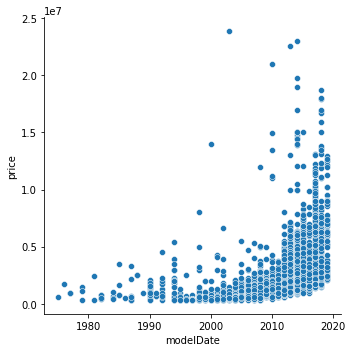

In [ ]:
sns.relplot(data=auto_data, x='modelDate', y='price');
plt.rcParams['figure.figsize']=(30,30)

In [ ]:
auto_data[(auto_data['modelDate'] == 2003) & (auto_data['price'] == 23900000.0)]['sell_id']

2999    1091464138
Name: sell_id, dtype: int64

In [ ]:
auto_data[(auto_data['modelDate'] == 2000) & (auto_data['price'] == 14000000.0)] ['sell_id']

903    1088911546
Name: sell_id, dtype: int64

In [ ]:
auto_data[(auto_data['modelDate'] == 1998) & (auto_data['price'] == 8000000.0)]['sell_id']

6153    1091186194
Name: sell_id, dtype: int64

In [ ]:
auto_data[auto_data['sell_id'] == 34212938]

,bodyType,brand,color,description,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel,engine_v
1530,седан,BMW,чёрный,Автомобиль был куплен в 2013 году у официально...,184,дизель,40130,2011,3ER,320d 2.0d AT (184 л.с.),4,1370000.0,2012,34212938,автоматическая,2 владельца,Оригинал,задний,Левый,2.0


In [ ]:
auto_data.drop(index=2999, axis = 0, inplace = True)
auto_data.drop(index=903, axis = 0, inplace = True)
auto_data.drop(index=6153, axis = 0, inplace = True)

In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6678 entries, 0 to 6681
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bodyType             6678 non-null   object 
 1   brand                6678 non-null   object 
 2   color                6678 non-null   object 
 3   description          6678 non-null   object 
 4   enginePower          6678 non-null   int64  
 5   fuelType             6678 non-null   object 
 6   mileage              6678 non-null   int64  
 7   modelDate            6678 non-null   int64  
 8   model_info           6678 non-null   object 
 9   name                 6678 non-null   object 
 10  numberOfDoors        6678 non-null   int64  
 11  price                6678 non-null   float64
 12  productionDate       6678 non-null   int64  
 13  sell_id              6678 non-null   int64  
 14  vehicleTransmission  6678 non-null   object 
 15  owners               6678 non-null   o

In [ ]:
auto_data.head()

,bodyType,brand,color,description,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel,engine_v
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,272,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,автоматическая,3 или более,Оригинал,полный,Левый,3.0
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",204,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,вариатор,2 владельца,Оригинал,передний,Левый,2.8
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,306,бензин,122733,2009,E_KLASSE,350 3.5 AT (306 л.с.) 4WD,4,1325000.0,2013,1100195530,автоматическая,3 или более,Оригинал,полный,Левый,3.5
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,180,бензин,151000,2011,A6,2.0 CVT (180 л.с.),4,815000.0,2011,1099880662,вариатор,3 или более,Оригинал,передний,Левый,2.0
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",160,бензин,140000,2007,A5,1.8 CVT (160 л.с.),5,810000.0,2011,1083244610,вариатор,3 или более,Оригинал,передний,Левый,1.8


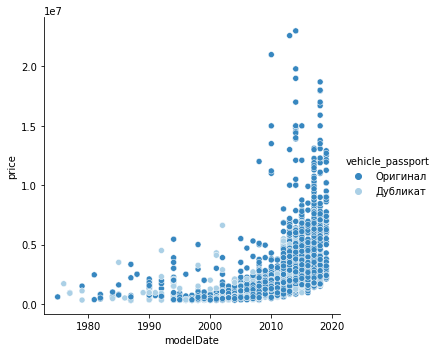

In [ ]:
sns.relplot(data=auto_data, x='modelDate', y='price', hue='vehicle_passport', palette = 'Blues_r');

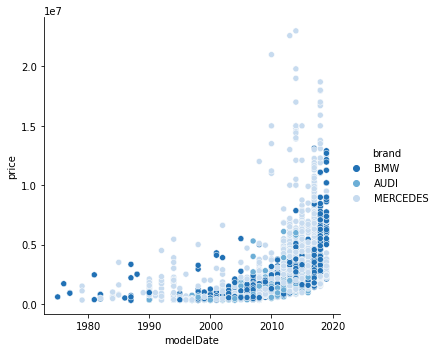

In [ ]:
sns.relplot(data=auto_data, x='modelDate', y='price', hue='brand', palette = 'Blues_r');

In [ ]:
auto_data.head()

,bodyType,brand,color,description,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel,engine_v
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,272,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,автоматическая,3 или более,Оригинал,полный,Левый,3.0
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",204,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,вариатор,2 владельца,Оригинал,передний,Левый,2.8
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,306,бензин,122733,2009,E_KLASSE,350 3.5 AT (306 л.с.) 4WD,4,1325000.0,2013,1100195530,автоматическая,3 или более,Оригинал,полный,Левый,3.5
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,180,бензин,151000,2011,A6,2.0 CVT (180 л.с.),4,815000.0,2011,1099880662,вариатор,3 или более,Оригинал,передний,Левый,2.0
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",160,бензин,140000,2007,A5,1.8 CVT (160 л.с.),5,810000.0,2011,1083244610,вариатор,3 или более,Оригинал,передний,Левый,1.8


In [ ]:
auto_data['color'].value_counts()

чёрный         2804
белый          1263
серый           732
синий           684
серебристый     340
коричневый      307
красный         203
бежевый          76
голубой          72
зелёный          70
фиолетовый       37
пурпурный        30
оранжевый        22
золотистый       21
жёлтый           16
розовый           1
Name: color, dtype: int64

In [ ]:
color_arr = ['чёрный', 'белый', 'серый', 'синий', 'серебристый']
def change_cat(value):
  if value in color_arr:
    return value
  else:
    return 'другой цвет'
auto_data['color'] = auto_data['color'].apply(change_cat)

In [ ]:
auto_data['color'].unique()

array(['чёрный', 'серебристый', 'белый', 'синий', 'серый', 'другой цвет'],
      dtype=object)

In [ ]:
auto_data.head(5)

,bodyType,brand,color,description,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel,engine_v
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,272,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,автоматическая,3 или более,Оригинал,полный,Левый,3.0
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",204,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,вариатор,2 владельца,Оригинал,передний,Левый,2.8
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,306,бензин,122733,2009,E_KLASSE,350 3.5 AT (306 л.с.) 4WD,4,1325000.0,2013,1100195530,автоматическая,3 или более,Оригинал,полный,Левый,3.5
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,180,бензин,151000,2011,A6,2.0 CVT (180 л.с.),4,815000.0,2011,1099880662,вариатор,3 или более,Оригинал,передний,Левый,2.0
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",160,бензин,140000,2007,A5,1.8 CVT (160 л.с.),5,810000.0,2011,1083244610,вариатор,3 или более,Оригинал,передний,Левый,1.8


In [ ]:
auto_data['bodyType'].value_counts()

седан                   2842
внедорожник 5 дв.       2315
купе                     426
хэтчбек 5 дв.            296
лифтбек                  245
универсал 5 дв.          153
минивэн                  146
купе-хардтоп              91
родстер                   60
кабриолет                 43
хэтчбек 3 дв.             41
компактвэн                 8
лимузин                    4
внедорожник 3 дв.          3
пикап двойная кабина       2
внедорожник открытый       2
седан 2 дв.                1
Name: bodyType, dtype: int64

In [ ]:
type_arr = ['седан', 'внедорожник 5 дв.', 'купе', 'хэтчбек 5 дв.', 'лифтбек']
def change_cat(value):
  if value in type_arr:
    return value
  else:
    return 'другой кузов'
auto_data['bodyType'] = auto_data['bodyType'].apply(change_cat)

In [ ]:
auto_data.head()

,bodyType,brand,color,description,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleTransmission,owners,vehicle_passport,type_of_drive,wheel,engine_v
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,272,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,автоматическая,3 или более,Оригинал,полный,Левый,3.0
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",204,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,вариатор,2 владельца,Оригинал,передний,Левый,2.8
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,306,бензин,122733,2009,E_KLASSE,350 3.5 AT (306 л.с.) 4WD,4,1325000.0,2013,1100195530,автоматическая,3 или более,Оригинал,полный,Левый,3.5
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,180,бензин,151000,2011,A6,2.0 CVT (180 л.с.),4,815000.0,2011,1099880662,вариатор,3 или более,Оригинал,передний,Левый,2.0
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",160,бензин,140000,2007,A5,1.8 CVT (160 л.с.),5,810000.0,2011,1083244610,вариатор,3 или более,Оригинал,передний,Левый,1.8


In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6678 entries, 0 to 6681
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bodyType             6678 non-null   object 
 1   brand                6678 non-null   object 
 2   color                6678 non-null   object 
 3   description          6678 non-null   object 
 4   enginePower          6678 non-null   int64  
 5   fuelType             6678 non-null   object 
 6   mileage              6678 non-null   int64  
 7   modelDate            6678 non-null   int64  
 8   model_info           6678 non-null   object 
 9   name                 6678 non-null   object 
 10  numberOfDoors        6678 non-null   int64  
 11  price                6678 non-null   float64
 12  productionDate       6678 non-null   int64  
 13  sell_id              6678 non-null   int64  
 14  vehicleTransmission  6678 non-null   object 
 15  owners               6678 non-null   o

In [ ]:
auto_data['description']

0       Авто на бодром ходу.  Все работает отлично.  П...
1       Продажа от собственника, второй владелец, ПТС ...
2       Внимание! Только для клиентов AVILON Автомобил...
3       В комплекте зимние колёса. 27.07.2020 Замена п...
4       Отличный авто, 2011 года выпуска, кроме передн...
                              ...                        
6677    Продаётся любимый автомобиль! За годы эксплуат...
6678    Куплена у официального дилера в 2017 г. \r\n\r...
6679    Торг на месте. Все работает. Сборка немецкая. ...
6680    Автомобиль в отличном состоянии.\r\n3-из Авто ...
6681    Удлиненный заводской Pullman на базе W140 (воо...
Name: description, Length: 6678, dtype: object

In [ ]:
auto_data['гараж'] = auto_data.description.apply(lambda x: 1 if 'гараж' in x else 0)
auto_data['подарок'] = auto_data.description.apply(lambda x: 1 if 'подарок' in x else 0)
auto_data['торг'] = auto_data.description.apply(lambda x: 1 if 'торг' in x else 0)
auto_data['шины'] = auto_data.description.apply(lambda x: 1 if ('шин' in x) or ('резин' in x) else 0)
auto_data['дилер'] = auto_data.description.apply(lambda x: 1 if 'дилер' in x else 0)
auto_data['подогрев'] = auto_data.description.apply(lambda x: 1 if 'подогрев' in x else 0)
auto_data['обмен'] = auto_data.description.apply(lambda x: 1 if 'обмен' in x else 0)
auto_data['обслуж'] = auto_data.description.apply(lambda x: 1 if 'обслуж' in x else 0)
auto_data['срочн'] = auto_data.description.apply(lambda x: 1 if 'срочн' in x else 0)
auto_data['полн'] = auto_data.description.apply(lambda x: 1 if 'полн' in x else 0)
auto_data['скидк'] = auto_data.description.apply(lambda x: 1 if 'скидк' in x else 0)
auto_data['диск'] = auto_data.description.apply(lambda x: 1 if 'диск' in x else 0)

In [ ]:
auto_data['4wd'] = auto_data['name'].apply(lambda x: 1 if '4WD' in x else 0)
auto_data['xdrive'] = auto_data['name'].apply(lambda x: 1 if 'xDrive' in x else 0)

In [ ]:
auto_data.drop('name', axis=1, inplace=True)

In [ ]:
auto_data['Y_no_sale'] = auto_data.productionDate - auto_data.modelDate
auto_data['m_per_y'] = auto_data.mileage/(2021 - auto_data['productionDate'])
auto_data['hard_usage'] = auto_data['m_per_y'].apply(lambda x: 1 if x >=20000 else 0)
auto_data['trash'] = auto_data.mileage.apply(lambda x: 1 if x>=300000 else 0)

In [ ]:
id = auto_data['sell_id']
auto_data.drop('sell_id', axis=1, inplace=True)


In [ ]:
def car_age(value):
  return 2022 - value
auto_data['car_age'] = auto_data['productionDate'].apply(car_age)

In [ ]:
def model_age(value):
  return 2022 - value
auto_data['modelAge'] = auto_data['modelDate'].apply(model_age)

In [ ]:
auto_data.drop('productionDate', axis=1, inplace=True)
auto_data.drop('modelDate', axis=1, inplace=True)


In [ ]:
auto_data.columns

Index(['bodyType', 'brand', 'color', 'description', 'enginePower', 'fuelType',
       'mileage', 'model_info', 'numberOfDoors', 'price',
       'vehicleTransmission', 'owners', 'vehicle_passport', 'type_of_drive',
       'wheel', 'engine_v', 'гараж', 'подарок', 'торг', 'шины', 'дилер',
       'подогрев', 'обмен', 'обслуж', 'срочн', 'полн', 'скидк', 'диск', '4wd',
       'xdrive', 'Y_no_sale', 'm_per_y', 'hard_usage', 'trash', 'car_age',
       'modelAge'],
      dtype='object')

In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6678 entries, 0 to 6681
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bodyType             6678 non-null   object 
 1   brand                6678 non-null   object 
 2   color                6678 non-null   object 
 3   description          6678 non-null   object 
 4   enginePower          6678 non-null   int64  
 5   fuelType             6678 non-null   object 
 6   mileage              6678 non-null   int64  
 7   model_info           6678 non-null   object 
 8   numberOfDoors        6678 non-null   int64  
 9   price                6678 non-null   float64
 10  vehicleTransmission  6678 non-null   object 
 11  owners               6678 non-null   object 
 12  vehicle_passport     6678 non-null   object 
 13  type_of_drive        6678 non-null   object 
 14  wheel                6678 non-null   object 
 15  engine_v             6678 non-null   f

In [ ]:
y = auto_data['price']

In [ ]:
auto_data['mileage'] = np.log(auto_data['mileage'])
auto_data['m_per_y'] = np.log(auto_data['m_per_y'])

In [ ]:
from sklearn import preprocessing

In [ ]:
columns_to_change = ['bodyType', 'brand', 'color', 'fuelType',
       'model_info', 'vehicleTransmission', 'owners',
       'vehicle_passport', 'type_of_drive', 'wheel']
one_hot_encoder = preprocessing.OneHotEncoder(handle_unknown='ignore', drop='first')

data_onehot = one_hot_encoder.fit_transform(auto_data[columns_to_change]).toarray()

column_names = one_hot_encoder.get_feature_names_out(columns_to_change)

data_onehot = pd.DataFrame(data_onehot, columns=column_names)
print('Shape of one hot data: {}'.format(data_onehot.shape))

Shape of one hot data: (6678, 139)


In [ ]:
result_df = pd.concat([
    auto_data.drop(columns_to_change, axis=1),
    data_onehot
], axis=1)

result_df.head()

,description,enginePower,mileage,numberOfDoors,price,engine_v,гараж,подарок,торг,шины,...,model_info_Z4,vehicleTransmission_вариатор,vehicleTransmission_механическая,vehicleTransmission_роботизированная,owners_2 владельца,owners_3 или более,vehicle_passport_Оригинал,type_of_drive_передний,type_of_drive_полный,wheel_Правый
0,Авто на бодром ходу. Все работает отлично. П...,272.0,12.409013,4.0,599000.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,"Продажа от собственника, второй владелец, ПТС ...",204.0,12.117241,4.0,850000.0,2.8,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,Внимание! Только для клиентов AVILON Автомобил...,306.0,11.717767,4.0,1325000.0,3.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,В комплекте зимние колёса. 27.07.2020 Замена п...,180.0,11.925035,4.0,815000.0,2.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,"Отличный авто, 2011 года выпуска, кроме передн...",160.0,11.849398,5.0,810000.0,1.8,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
result_df.dropna(axis=0, inplace=True)

In [ ]:
df = result_df['description']
result_df.drop('description', axis = 1, inplace=True)

In [ ]:
auto_data = pd.get_dummies(drop_first=True, data=auto_data)

In [ ]:
auto_data

,enginePower,mileage,numberOfDoors,price,engine_v,гараж,подарок,торг,шины,дилер,...,model_info_Z4,vehicleTransmission_вариатор,vehicleTransmission_механическая,vehicleTransmission_роботизированная,owners_2 владельца,owners_3 или более,vehicle_passport_Оригинал,type_of_drive_передний,type_of_drive_полный,wheel_Правый
0,272,12.409013,4,599000.0,3.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,204,12.117241,4,850000.0,2.8,0,0,0,1,1,...,0,1,0,0,1,0,1,1,0,0
2,306,11.717767,4,1325000.0,3.5,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,180,11.925035,4,815000.0,2.0,0,0,1,1,0,...,0,1,0,0,0,1,1,1,0,0
4,160,11.849398,5,810000.0,1.8,0,1,0,1,1,...,0,1,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,150,12.357836,4,550000.0,2.0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
6678,190,10.425253,4,1900000.0,2.0,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
6679,143,12.206073,4,530000.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6680,310,11.184421,4,1970000.0,3.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
set(data_onehot.columns) - set(auto_data.columns)

set()

In [ ]:
auto_data.to_csv('auto.csv')

In [ ]:
auto_data = pd.read_csv('/content/auto.csv')

In [ ]:
auto_data.head()

,Unnamed: 0,enginePower,mileage,numberOfDoors,price,engine_v,гараж,подарок,торг,шины,...,model_info_Z4,vehicleTransmission_вариатор,vehicleTransmission_механическая,vehicleTransmission_роботизированная,owners_2 владельца,owners_3 или более,vehicle_passport_Оригинал,type_of_drive_передний,type_of_drive_полный,wheel_Правый
0,0,272,12.409013,4,599000.0,3.0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,1,204,12.117241,4,850000.0,2.8,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
2,2,306,11.717767,4,1325000.0,3.5,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,3,180,11.925035,4,815000.0,2.0,0,0,1,1,...,0,1,0,0,0,1,1,1,0,0
4,4,160,11.849398,5,810000.0,1.8,0,1,0,1,...,0,1,0,0,0,1,1,1,0,0


In [ ]:
auto_data.to_csv('auto_c.csv')

In [ ]:
auto_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
auto_data.plot(
    kind='scatter',
    x='mileage',
    y='modelDate',
    c=auto_data['price'],
    colormap='viridis',
    figsize=(10, 10)

);

In [ ]:
auto_data

In [ ]:
sns.relplot(data=auto_data, x='car_age', y='price');

In [ ]:
auto_data.head()

In [ ]:
abs(auto_data['price'].mean() - auto_data['price'].median())

In [ ]:
auto_data.describe()

In [ ]:
np.log(auto_data['mileage'] + 1).hist();


In [ ]:
np.log(auto_data['price'] + 1).hist();
plt.rcParams['figure.figsize']=(10,10)

In [ ]:
(auto_data['m_per_y'] + 1).hist();

In [ ]:
def outliers_iqr(data, feature, log=False, left=1.5, right=1.5):
    if log:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, iqr_data = outliers_iqr(auto_data, 'price', log=True, left=3, right=3)
print('Количество найденных выбросов:', outliers.shape[0])

In [ ]:
outliers, iqr_data = outliers_iqr(auto_data, 'mileage', log=True, left=9, right=3)
print('Количество найденных выбросов:', outliers.shape[0])

In [ ]:
auto_data.head()

In [ ]:
auto_data['mileage'] = np.log(auto_data['mileage'])
auto_data['m_per_y'] = np.log(auto_data['m_per_y'])

In [ ]:
auto_data.head()

In [ ]:
auto_data.info(10)

In [ ]:
auto_data.to_csv('auto_lear.csv')

In [ ]:
##################################################3333

In [ ]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
data_onehot.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6678 entries, 0 to 6677
Data columns (total 139 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    bodyType_другой кузов                 float64
 1    bodyType_купе                         float64
 2    bodyType_лифтбек                      float64
 3    bodyType_седан                        float64
 4    bodyType_хэтчбек 5 дв.                float64
 5    brand_BMW                             float64
 6    brand_MERCEDES                        float64
 7    color_другой цвет                     float64
 8    color_серебристый                     float64
 9    color_серый                           float64
 10   color_синий                           float64
 11   color_чёрный                          float64
 12   fuelType_гибрид                       float64
 13   fuelType_дизель                       float64
 14   fuelType_электро                      float64
 15   mo

In [ ]:
X = result_df.drop('price', axis=1)
y = result_df['price']

In [ ]:
y

0        599000.0
1        850000.0
2       1325000.0
3        815000.0
4        810000.0
          ...    
6677     550000.0
6678    1900000.0
6679     530000.0
6680    1970000.0
6681    3000000.0
Name: price, Length: 6682, dtype: float64

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)


In [ ]:
import pickle

In [ ]:
 with open('scaler.pickle', 'wb') as f:
      pickle.dump(scaler, f)

In [ ]:
X_scaled.describe().round(2)

,enginePower,mileage,numberOfDoors,engine_v,гараж,подарок,торг,шины,дилер,подогрев,...,vehicleTransmission_механическая,vehicleTransmission_роботизированная,owners_2 владельца,owners_3 или более,vehicle_passport_Оригинал,type_of_drive_передний,type_of_drive_полный,wheel_Правый,car_age,modelAge
count,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,...,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00,6678.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,...,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.66,-1.48,-2.58,-2.62,-0.17,-0.27,-0.35,-1.09,-0.66,-0.27,...,-0.14,-0.41,-0.66,-0.81,-2.90,-0.34,-1.30,-0.02,-1.58,-1.65
25%,-0.66,-0.75,-0.31,-0.73,-0.17,-0.27,-0.35,-1.09,-0.66,-0.27,...,-0.14,-0.41,-0.66,-0.81,0.35,-0.34,-1.30,-0.02,-0.79,-0.72
50%,-0.23,-0.12,-0.31,0.02,-0.17,-0.27,-0.35,0.92,-0.66,-0.27,...,-0.14,-0.41,-0.66,-0.81,0.35,-0.34,0.77,-0.02,-0.19,-0.16
75%,0.46,0.58,0.83,0.21,-0.17,-0.27,-0.35,0.92,1.52,-0.27,...,-0.14,-0.41,1.53,1.24,0.35,-0.34,0.77,-0.02,0.60,0.59
max,3.51,10.80,0.83,3.59,5.96,3.69,2.87,0.92,1.52,3.68,...,6.94,2.44,1.53,1.24,0.35,2.92,0.77,57.78,5.95,6.55


In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_scaled, y)

LinearRegression()

In [ ]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[ 9.48748936e+05 -5.48233529e+04 -3.88300428e+03 -5.33021116e+05
 -9.27240868e+03 -3.45851113e+04 -1.81197105e+03  9.77272888e+03
 -9.55542021e+03  1.81174172e+04 -4.98909153e+04 -3.33992515e+04
 -2.10882708e+04  6.28215758e+04  3.03199349e+02  3.75522711e+04
  2.44779022e+18 -9.88280823e+04 -9.39492740e+17 -4.61370595e+05
  1.41239065e+05  1.21219061e+05 -1.77066077e+05 -1.09872341e+05
 -9.57450170e+04 -3.93761191e+05 -1.24624431e+05 -4.48870886e+18
  3.87988802e+18  3.56390107e+04  4.26942789e+04  4.05646453e+04
  1.02370740e+04  8.48000000e+04 -1.30560000e+04  2.18368000e+05
 -2.60480000e+04  1.30752928e+18  1.92725370e+17  3.14601316e+17
  2.22523418e+17  2.31718819e+18  8.07018520e+17  2.62216628e+18
  9.64710890e+17  1.65507072e+18  2.94304644e+17  1.06080000e+04
  3.76960000e+04  3.32800000e+04  1.40800000e+03 -2.25280000e+04
  8.09600000e+04  2.18880000e+04  3.62560000e+04  1.63840000e+04
 -2.23523473e+17 -3.60204658e+17 -7.31871125e+17 -1.99940451e+17
 -5.90056664e+17 -9.99926

In [ ]:
linear_regression.score(X_scaled, y)

0.7452612081722338

In [ ]:
linear_regression = linear_model.SGDRegressor(
    loss = 'squared_error',
    eta0 = 0.002,
    random_state=42,
)
linear_regression.fit(X_scaled, y)

SGDRegressor(eta0=0.002, random_state=42)

In [ ]:
linear_regression.score(X_scaled, y)

0.7450535990555176

In [ ]:
##############################################3

In [ ]:
dt = tree.DecisionTreeRegressor(
    criterion='absolute_error',
    max_depth=9,
    random_state=42
)
dt.fit(X, y)

dt_prediction = dt.predict(X)

dt.score(X, y)

0.9479301309502484

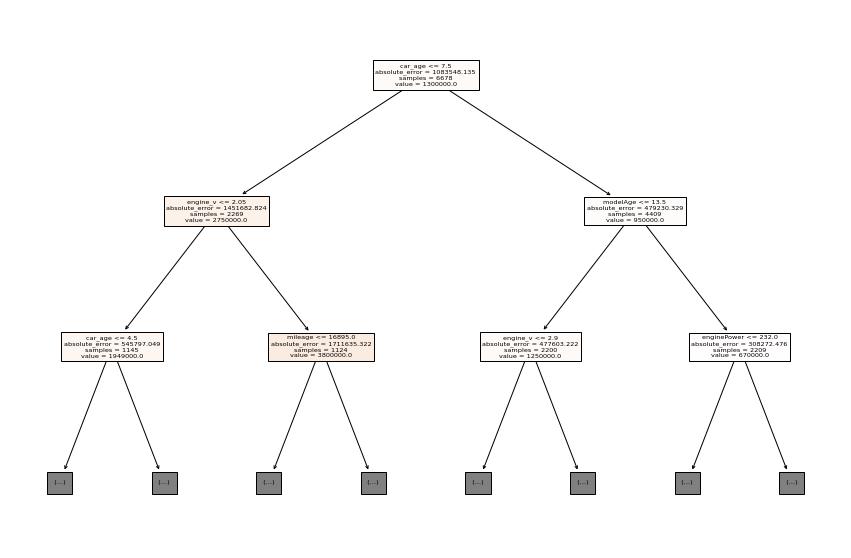

In [ ]:
fig = plt.figure(figsize=(15, 10))
tree_graph = tree.plot_tree(
    dt,
    max_depth=2,
    feature_names=X.columns,
    filled=True,
    impurity=True
);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = tree.DecisionTreeRegressor(
    criterion='absolute_error',
    max_depth=7,
    random_state=42
)
dt.fit(X_train, y_train)


dt_prediction = dt.predict(X_test)

dt.score(X_test, y_test)

0.7923449278047148

In [ ]:
dt.score(X_train, y_train)

0.8883239546044321

In [ ]:
##############################################333

In [ ]:
scaler = preprocessing.StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
select = RFE(linear_model.SGDRegressor(loss = 'squared_error',
    eta0 = 0.002,
    random_state=42,), n_features_to_select=70)
select.fit(X_scaled_train, y_train)
X_train_selected = select.transform(X_scaled_train)

In [ ]:
X_test_selected = select.transform(X_scaled_test)

In [ ]:
linear_regression_s = linear_model.SGDRegressor(
    loss = 'squared_error',
    eta0 = 0.001,
    random_state=42,
)
linear_regression_s.fit(X_train_selected, y_train)

SGDRegressor(eta0=0.001, random_state=42)

In [ ]:
linear_regression_s.score(X_test_selected, y_test)

0.7167882512873959

In [ ]:
linear_regression_s.score(X_train_selected, y_train)

0.7156907641548391

In [ ]:
print(linear_regression_s.coef_)
print(linear_regression_s.intercept_)

[ 839507.2199525  -404485.18033267 -454538.12482758   56262.37910294
  -82834.83878467   23027.43145676   28598.61702009   50959.96821225
   53918.37593916   82041.41086538  190450.16841688  -55410.49361656
  -27706.38724912  -25005.81422115  -33733.95951061  -38111.29948434
   69194.53144396  101369.01943106  -43828.98811804   30705.21121109
  174325.93723058  -23046.15278824  -26479.42824482   32750.7116741
  -49169.2839631    49814.373717    -21052.15734588  -40108.7894332
   72782.08286197   53782.94228819  107009.27429044   86348.23133808
  -36415.24722016  137599.28621487   76130.091404    330277.72211337
  345349.80197709  -35663.94429822   37538.24030132   44506.64334037
   60140.13863862  -31508.02860511  -35565.30440799   97699.0794132
   32951.73769266   22760.9409899   299565.18201114   34178.82451145
   71077.61258568  246544.27421625  198605.78260267  176986.66867997
   90229.24458763  286576.49922667   44944.32098489   26006.03289164
  -75059.02356142  -56736.02315461   

In [ ]:
#################################################

In [ ]:
dtr = tree.DecisionTreeRegressor(
    criterion='absolute_error',
    max_depth=7,
    random_state=42,
    min_samples_split=4,
    min_samples_leaf=2)
dtr.fit(X_train_selected, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=2, min_samples_split=4, random_state=42)

In [ ]:
dtr.score(X_test_selected, y_test)

0.7630755835650085

In [ ]:
dtr.score(X_train_selected, y_train)

0.8716714796908032

In [ ]:
#####################################

In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train_selected, y_train)

LinearRegression()

In [ ]:
print(f"{linear_regression.score(X_train_selected, y_train)} - тренировочная выборка")
print(f"{linear_regression.score(X_test_selected, y_test)} - тестовая выборка")

0.7158116562577326 - тренировочная выборка
0.7171308488180134 - тестовая выборка


In [ ]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[ 898687.11073142 -402351.38122168 -508323.25004185   54232.0218418
  -81249.33244674   32173.48937984   28598.97678125   52252.94015901
   54464.67161765   82751.674766    197583.9696175   -52324.47665619
  -26410.59000741  -24482.71201572  -31150.13866707  -36649.51510179
   69580.42745361  101526.5994592   -43779.63047478   29269.62225181
  170832.95197996  -22963.62725234  -28830.22729041   33601.23406296
  -49705.6004964    44731.11142091  -21926.12100187  -43648.17320913
   73119.49964112   52215.54992896  107165.26361617   84418.07548734
  -36199.45748674  137024.40797194   74702.8016255   331345.8300304
  340668.57330923  -37518.27431581   37158.30026154   41364.18213225
   55873.0016983   -31245.35869481  -35942.60048783   98403.88445122
   32520.64102304   19811.80345583  299622.90693007   34431.86246321
   70384.47365477  244239.32203146  197587.89605656  171537.0594252
   89954.37463092  286077.10932932   43595.07182175   24646.49320798
  -71998.87898087  -55800.21484682   

In [ ]:
###################################
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,  # 500
    criterion='squared_error',
    max_depth=5,   # 10
    random_state=42
)
# Обучаем модель случайного леса
rf.fit(X_train_selected, y_train)

# Делаем предсказание
rf_prediction = rf.predict(X_train_selected)

rf.score(X_train_selected, y_train)
#rf_prediction

0.8474490321537361

In [ ]:
# Делаем предсказание
rf_prediction = rf.predict(X_test_selected)

rf.score(X_test_selected, y_test)

0.7607070516771646

In [ ]:
#############################################
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Создаем модель градиентного бустинга
gb = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.05,
    n_estimators=100,  # 200
    max_depth=5
)

# Обучаем модель градиентного бустинга
gb.fit(X_train_selected, y_train)

# Делаем предсказание
gb_prediction = gb.predict(X_train_selected)

gb.score(X_train_selected, y_train)

0.955060932380779

In [ ]:
# Делаем предсказание
gb_prediction = gb.predict(X_test_selected)

gb.score(X_test_selected, y_test)

0.8307668276215333

In [ ]:
##############################################
from sklearn.ensemble import StackingRegressor

In [ ]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', linear_model.SGDRegressor(
        loss='squared_error', #функция потерь
        eta0=0.01, #темп обучения
        random_state=42 #генератор случайных чисел
        )
    ),
    ('dt', tree.DecisionTreeRegressor(
        criterion='squared_error', #критерий информативности
        max_depth=10, #максимальная глубина дерева
        random_state=42 #генератор случайных чисел
        )
    ),
    ('rf', RandomForestRegressor(
        n_estimators=300, #число деревьев в лесу
        criterion='squared_error', #критерий информативности
        max_depth=6, #максимальная глубина дерева
        random_state=42 #генератор случайных чисел
        )
    )
]

#Создаем объект класса стекинг
stack = StackingRegressor(
    estimators,
    final_estimator=linear_model.LinearRegression()
)

#Обучаем модель
stack.fit(X_train_selected, y_train)

#Делаем предсказание
stack_prediction = stack.predict(X_train_selected)

stack.score(X_train_selected, y_train)

0.8482151944558465

In [ ]:
#Делаем предсказание
stack_prediction = stack.predict(X_test_selected)

stack.score(X_test_selected, y_test)

0.7993731477613617

In [ ]:
##############################################

In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics

from sklearn import model_selection

In [ ]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.shape

(6678, 145)

In [ ]:
select = RFE(linear_model.SGDRegressor(loss = 'squared_error',
    eta0 = 0.002,
    random_state=42,), n_features_to_select=120)
X_selected = select.fit_transform(X_scaled, y)

In [ ]:
X_selected.shape

(6678, 120)

In [ ]:
linear_regression_s = linear_model.SGDRegressor(
    loss = 'squared_error',
    eta0 = 0.002,
    random_state=42,
)
kf = model_selection.KFold(n_splits=5)

cv_metrics = model_selection.cross_validate(
    estimator=linear_regression_s, #модель
    X=X_selected, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='neg_mean_absolute_percentage_error', #метрика
    return_train_score=True #подсчет метрики на тренировочных фолдах
)

print('Train k-fold mean accuracy: {:.2f}'.format(-np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(-np.mean(cv_metrics['test_score'])))

Train k-fold mean accuracy: 0.40
Valid k-fold mean accuracy: 0.41


In [ ]:
####################################################

In [ ]:
X_scaled_train.std()

0.9999999999999999

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras import backend
from tensorflow.keras import metrics

In [ ]:
count_features = 139
backend.clear_session()
# Обучаем модель полученными данными
model = models.Sequential([
    layers.InputLayer(input_shape=(count_features, )),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.Dense(units=1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               35840     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                        

In [ ]:
# Компилируем модель
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3), #алгоритм оптимизации
    loss='mae', #функция потерь
    metrics=['mape'] #метрика
)
# Обучаем модель
history = model.fit(
    X_scaled_train, y_train, #примеры и ответы к ним
    batch_size=20, #сколько примеров подаем на один шаг градиентного спуска
    epochs=25, #сколько раз будем пропускать данные через сеть
    verbose=2, #без process bar'a
    validation_data=(X_scaled_test, y_test) #выборка для контроля
)

Epoch 1/25
224/224 - 5s - loss: 939984.4375 - mape: 47.5710 - val_loss: 427231.7812 - val_mape: 18.8348 - 5s/epoch - 21ms/step
Epoch 2/25
224/224 - 3s - loss: 403965.8750 - mape: 18.9096 - val_loss: 390756.9062 - val_mape: 17.2717 - 3s/epoch - 13ms/step
Epoch 3/25
224/224 - 3s - loss: 360731.8750 - mape: 16.7753 - val_loss: 334753.2500 - val_mape: 15.7654 - 3s/epoch - 13ms/step
Epoch 4/25
224/224 - 3s - loss: 350758.5000 - mape: 16.1632 - val_loss: 323297.4062 - val_mape: 15.3584 - 3s/epoch - 13ms/step
Epoch 5/25
224/224 - 3s - loss: 332563.7500 - mape: 15.3491 - val_loss: 336138.7812 - val_mape: 15.0262 - 3s/epoch - 13ms/step
Epoch 6/25
224/224 - 3s - loss: 327606.5000 - mape: 15.0531 - val_loss: 310450.4688 - val_mape: 14.3259 - 3s/epoch - 13ms/step
Epoch 7/25
224/224 - 3s - loss: 321599.5312 - mape: 14.8544 - val_loss: 312843.7188 - val_mape: 15.0266 - 3s/epoch - 13ms/step
Epoch 8/25
224/224 - 3s - loss: 323104.5000 - mape: 14.7346 - val_loss: 323763.0625 - val_mape: 14.9071 - 3s/ep

In [ ]:
import matplotlib.pyplot as plt

def plot_history_learning(history, figsize=(15,5)):
    # Создаем фигуру и 2 координатные плоскости
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    # Строим два линейных графика для метрик на первой плоскости
    axes[0].plot(history.history['mape'], label='Train metric')
    axes[0].plot(history.history['val_mape'], label='Test metric')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Metric')
    axes[0].grid()
    # Строим два линейных графика для метрик на второй плоскости
    axes[1].plot(history.history['loss'], label='Train loss')
    axes[1].plot(history.history['val_loss'], label='Test loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].grid()
    plt.legend()

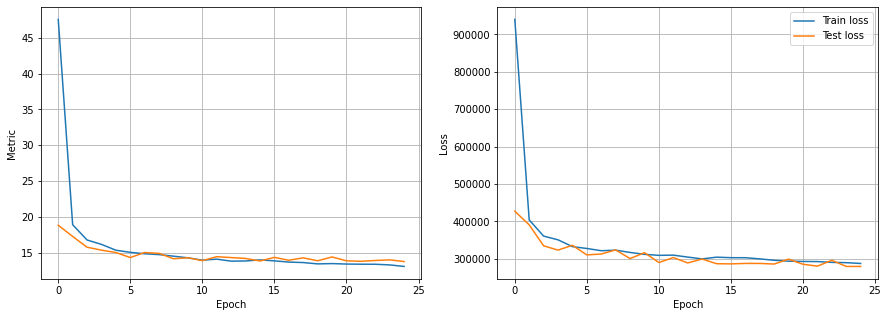

In [ ]:
plot_history_learning(history)

In [ ]:
predictions = model.predict(X_scaled_test)
predictions_df = pd.DataFrame({'PredictedPrice': predictions.reshape(-1)}, index=X_test.index)

print('MAE: {:.2f} th.$'.format(metrics.mae(y_test, predictions.reshape(-1))))
print('MAPE: {:.2f} %'.format(metrics.mape(y_test, predictions.reshape(-1))))

MAE: 289709.50 th.$
MAPE: 14.06 %


In [ ]:
# callback для сохранения лучшей модели
model_checkpoint = callbacks.ModelCheckpoint(
    filepath='model_checkpoint/model.h5', #путь до файла для сохранения
    monitor='val_loss', #на что ориентируемся при сохранении
    verbose=1, #отображать ли сохранение
    save_best_only=True, #сохраняем только самое лучшее
    save_weights_only=False, #сохраняем только веса
)

# callback для ранней остановки модели
early_stoping = callbacks.EarlyStopping(
    monitor = "val_loss", #на что ориентируемся при остановки
    mode = "min", #потери должны быть минимальны
    patience = 20, #остановка в случае, если потери не уменьшаются n эпох
)

# callback для уменьшения learning rate
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', #на что ориентируемся для уменьшении
    factor=0.5, #множитель для изменения learning rate
    patience=5, #сколько эпох не должны меняться потери, чтобы уменьшить learning rate
    verbose=1, #отображать ли изменение в истории
)

callback_list = [model_checkpoint, early_stoping, reduce_lr]

# Компилируем модель
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3), #алгоритм оптимизации
    loss='mae', #функция потерь
    metrics=['mape'] #метрика
)
# Обучаем модель
history = model.fit(
    X_scaled_train, y_train, #примеры и ответы к ним
    batch_size=32, #сколько примеров подаем на один шаг градиентного спуска
    epochs=200, #сколько раз будем пропускать данные через сеть
    verbose=2, #без process bar'a
    validation_data=(X_scaled_test, y_test), #выборка для контроля
    callbacks = callback_list #список callbacks
)

Epoch 1/200

Epoch 1: val_loss improved from inf to 1506302.87500, saving model to model_checkpoint/model.h5
167/167 - 2s - loss: 1825959.7500 - mape: 93.9579 - val_loss: 1506302.8750 - val_mape: 65.8616 - lr: 0.0010 - 2s/epoch - 9ms/step
Epoch 2/200

Epoch 2: val_loss improved from 1506302.87500 to 867332.43750, saving model to model_checkpoint/model.h5
167/167 - 1s - loss: 1108670.6250 - mape: 50.2581 - val_loss: 867332.4375 - val_mape: 46.0417 - lr: 0.0010 - 665ms/epoch - 4ms/step
Epoch 3/200

Epoch 3: val_loss improved from 867332.43750 to 769591.93750, saving model to model_checkpoint/model.h5
167/167 - 1s - loss: 824321.5625 - mape: 46.3701 - val_loss: 769591.9375 - val_mape: 42.6380 - lr: 0.0010 - 699ms/epoch - 4ms/step
Epoch 4/200

Epoch 4: val_loss improved from 769591.93750 to 748857.56250, saving model to model_checkpoint/model.h5
167/167 - 1s - loss: 802726.6250 - mape: 46.4886 - val_loss: 748857.5625 - val_mape: 41.2503 - lr: 0.0010 - 675ms/epoch - 4ms/step
Epoch 5/200

Ep

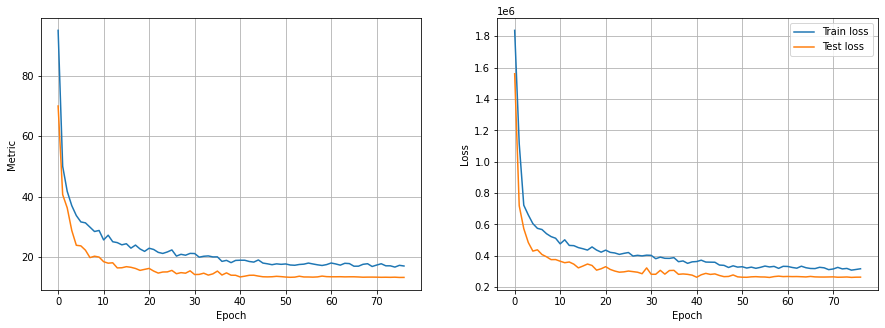

In [ ]:
plot_history_learning(history)

In [ ]:
model.load_weights('model_checkpoint/model.h5')

predictions = model.predict(X_scaled_test)

predictions_df = pd.DataFrame({'PredictedPrice': predictions.reshape(-1)}, index=X_test.index)

print('MAE: {:.2f} rub'.format(metrics.mae(y_test, predictions.reshape(-1))))
print('MAPE: {:.2f} %'.format(metrics.mape(y_test, predictions.reshape(-1))))

MAE: 262118.56 rub
MAPE: 13.30 %


In [ ]:
##################################################################################3

In [ ]:
!pip install pymorphy2
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 8.2 MB 22.4 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=b66240dc422b954193ca41329eff9389c99bae7a118edbdf26827e67bcb65825
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from pymorphy2 import MorphAnalyzer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tf.random.set_seed(0)

In [ ]:
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc, stopwords=stopwords_ru):
    #исключаем символы не подходящие под патерны
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            tokens.append(token)
    return ' '.join(tokens)
df.apply(lemmatize)

0       авто бодрый ход всё работать отлично по электр...
1       продажа собственник второй владелец птс оригин...
2       внимание только клиент автомобиль пробег предл...
3       в комплект зимний колесо замена передний тормо...
4       отличный авто год выпуск кроме передний левый ...
                              ...                        
6673                                 всё офицальный дилер
6674    добрый день пожалуйста прочитать описание полн...
6675    этот автомобиль вы мочь приобрести кредит такж...
6676    комплектация автомобиль • розетка • штатный ау...
6677    продаваться любимый автомобиль за год эксплуат...
Name: description, Length: 6674, dtype: object

In [ ]:
text = df['processed_text']
labels = df['price']

In [ ]:
train_text, test_text, train_labels, test_labels = model_selection.train_test_split(
    df, y, test_size=0.2, random_state=42
)

In [ ]:
vocab_size = 100000 # количество слов
oov_tok = '<OOV>' # OOV = Out of Vocabulary

In [ ]:
tokenizer = Tokenizer(
    num_words=vocab_size,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n•–∙—″☑️✔➥●·✅☛———————————————————————————®«°»”😎―▼✪。❗👋☝😅🥇✌🤷♂⬇👌🔥❌🤫👮🏻👍🏽👍☝💡🧟👍🏻✈🏝💥🚨🏆☝🏼👌🏻😉🔕🎁⛽🧐☆😒✨👌🏼😁🔝😀🤛😂✌🏽😃👺🎯💪😇\u200b☎ß=…\uf0d8',
    lower=True,
    oov_token=oov_tok
)

tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index

In [ ]:
 with open('tokenizer.pickle', 'wb') as f:
      pickle.dump(tokenizer, f)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_text)
test_sequences = tokenizer.texts_to_sequences(test_text)

In [ ]:
trunc_type = 'post' #метод ограничения
padding_type = 'post' #метод дополнения
embedding_dim = 64 # размер эмбединга
max_length = 300 # максимальная длина последовательности

# ограничиваем длину последовательностей
train_padded = pad_sequences(
    train_sequences,
    maxlen=max_length,
    padding=padding_type,
    truncating=trunc_type
)

test_padded = pad_sequences(
    test_sequences,
    maxlen=max_length,
    padding=padding_type,
    truncating=trunc_type
)

In [ ]:
backend.clear_session()
model = models.Sequential([
    layers.Embedding(vocab_size, 128, input_length=max_length),
    layers.LSTM(256, return_sequences=True),
    layers.Dropout(0.5),
    layers.LSTM(128),
    layers.Dropout(0.25),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(1, activation='linear'),
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='mae',
    metrics=['mape']
)

In [ ]:
model_save_path = 'best_model.h5'
# callback для сохранения лучшей модели
model_checkpoint = callbacks.ModelCheckpoint(
    filepath=model_save_path, #путь до файла для сохранения
    monitor='val_loss', #на что ориентируемся при сохранении
    verbose=1, #отображать ли сохранение
    save_best_only=True, #сохраняем только самое лучшее
    save_weights_only=False, #сохраняем только веса
)

# callback для ранней остановки модели
early_stoping = callbacks.EarlyStopping(
    monitor = "val_loss", #на что ориентируемся при остановки
    mode = "min", #потери должны быть минимальны
    patience = 10, #остановка в случае, если потери не уменьшаются n эпох
)

# callback для уменьшения learning rate
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', #на что ориентируемся для уменьшении
    factor=0.5, #множитель для изменения learning rate
    patience=5, #сколько эпох не должны меняться потери, чтобы уменьшить learning rate
    verbose=1, #отображать ли изменение в истории
)

callback_list = [early_stoping, reduce_lr]

In [ ]:
history = model.fit(
    train_padded,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(test_padded, test_labels),
    callbacks=callback_list
)

In [ ]:
#########################################################################

In [ ]:
from numpy.ma.core import concatenate

backend.clear_session()
count_features = 163

model_nlp = models.Sequential([
    layers.Embedding(vocab_size, 128, input_length=max_length),
    layers.LSTM(256, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(128),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2)
])


model_mlp = models.Sequential([
    layers.InputLayer(input_shape=(count_features, )),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(rate=0.1),
])

combineInput = layers.concatenate([model_nlp.output, model_mlp.output])

head = layers.Dense(64, activation='relu')(combineInput)
head = layers.Dropout(0.2)(head)
head = layers.Dense(1, activation='linear')(head)

model = models.Model(inputs=[model_nlp.input, model_mlp.input], outputs=head)
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='mae',
    metrics=['mape']
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 163)]        0           []                               
                                                                                                  
 embedding_input (InputLayer)   [(None, 300)]        0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 256)          41984       ['input_1[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 300, 128)     12800000    ['embedding_input[0][0]']        
                                                                                              

In [ ]:
from tensorflow.keras import utils

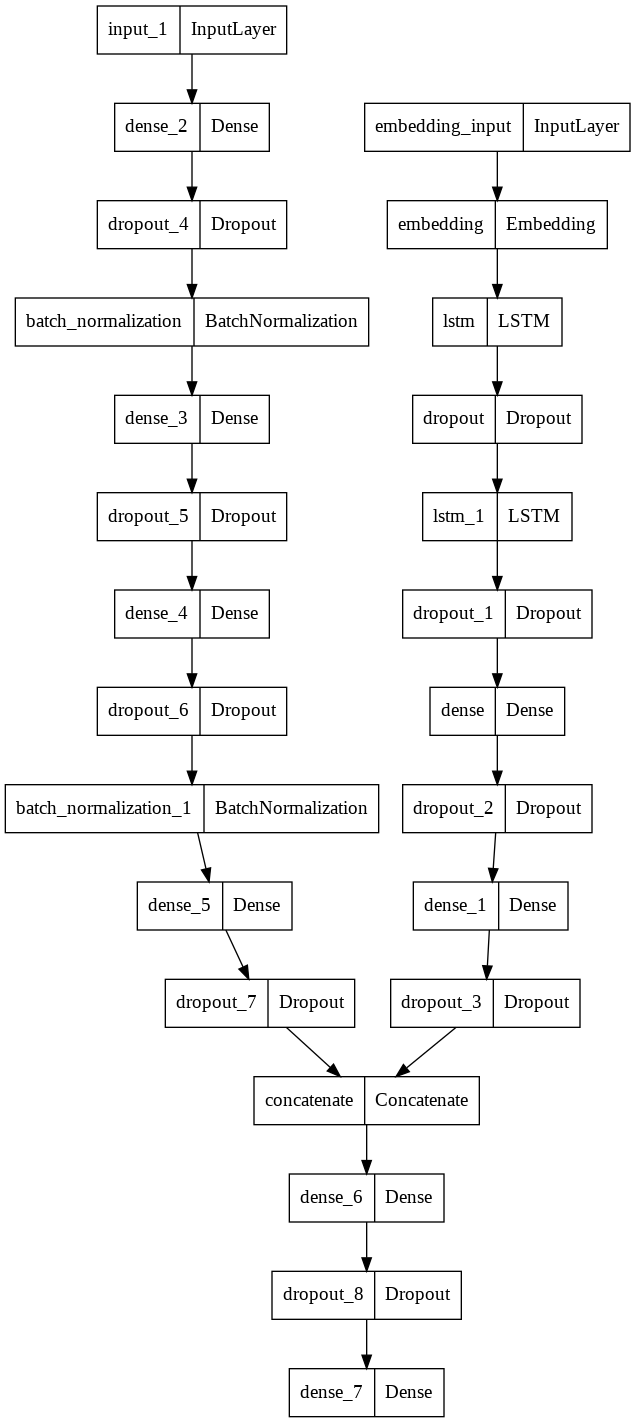

In [ ]:
utils.plot_model(model)


In [ ]:
# callback для ранней остановки модели
early_stoping = callbacks.EarlyStopping(
    monitor = "val_loss", #на что ориентируемся при остановки
    mode = "min", #потери должны быть минимальны
    patience = 40, #остановка в случае, если потери не уменьшаются n эпох
)

# callback для уменьшения learning rate
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', #на что ориентируемся для уменьшении
    factor=0.5, #множитель для изменения learning rate
    patience=3, #сколько эпох не должны меняться потери, чтобы уменьшить learning rate
    verbose=1, #отображать ли изменение в истории
)
model_checkpoint = callbacks.ModelCheckpoint(
    filepath='model_checkpoint/model.h5', #путь до файла для сохранения
    monitor='val_loss', #на что ориентируемся при сохранении
    verbose=1, #отображать ли сохранение
    save_best_only=True, #сохраняем только самое лучшее
    save_weights_only=False, #сохраняем только веса
)

callback_list1 = [reduce_lr, model_checkpoint]

In [ ]:
X_scaled_train.shape

(5339, 163)

In [ ]:
y_train

5020     870000.0
3754    2520000.0
2477     500000.0
799     1390000.0
354     5550000.0
          ...    
3774    3845000.0
5194    2450000.0
5229     565000.0
5393    1250000.0
860      659000.0
Name: price, Length: 5342, dtype: float64

In [ ]:
history = model.fit([train_padded,  X_scaled_train], y_train, batch_size=512, epochs=250,
                    validation_data=([test_padded, X_scaled_test], y_test),
                    callbacks=callback_list1)

Epoch 1/250
11/11 [==============================] - ETA: 0s - loss: 1912206.3750 - mape: 99.9995
Epoch 1: val_loss improved from inf to 1821491.25000, saving model to model_checkpoint/model.h5
11/11 [==============================] - 8s 355ms/step - loss: 1912206.3750 - mape: 99.9995 - val_loss: 1821491.2500 - val_mape: 99.9981 - lr: 0.0010
Epoch 2/250
11/11 [==============================] - ETA: 0s - loss: 1912160.8750 - mape: 99.9953
Epoch 2: val_loss improved from 1821491.25000 to 1821373.12500, saving model to model_checkpoint/model.h5
11/11 [==============================] - 3s 272ms/step - loss: 1912160.8750 - mape: 99.9953 - val_loss: 1821373.1250 - val_mape: 99.9872 - lr: 0.0010
Epoch 3/250
11/11 [==============================] - ETA: 0s - loss: 1911978.5000 - mape: 99.9785
Epoch 3: val_loss improved from 1821373.12500 to 1821027.50000, saving model to model_checkpoint/model.h5
11/11 [==============================] - 3s 268ms/step - loss: 1911978.5000 - mape: 99.9785 - val_

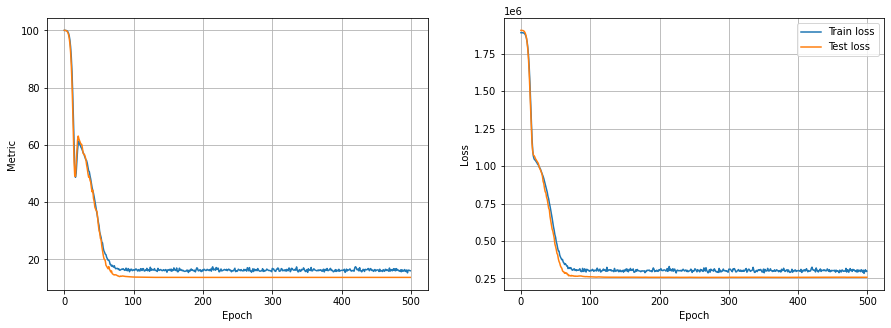

In [ ]:
plot_history_learning(history)

In [ ]:
predictions = model.predict([test_padded, X_scaled_test])

predictions_df = pd.DataFrame({'PredictedPrice': predictions.reshape(-1)}, index=X_test.index)

print('MAE: {:.2f} rub'.format(metrics.mae(y_test, predictions.reshape(-1))))
print('MAPE: {:.2f} %'.format(metrics.mape(y_test, predictions.reshape(-1))))

MAE: 401735.53 rub
MAPE: 22.65 %


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor


In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
model_cat = CatBoostRegressor(iterations=5000,
                              random_seed = 42,
                              eval_metric='MAPE',
                              custom_metric = 'MAE')
model_cat.fit(X_scaled_train, y_train,
              eval_set=(X_scaled_test, y_test),
              verbose_eval=100,
              use_best_model=True)

Learning rate set to 0.024816
0:	learn: 0.0418604	test: 0.0415982	best: 0.0415982 (0)	total: 3.96ms	remaining: 19.8s
100:	learn: 0.0135023	test: 0.0136718	best: 0.0136718 (100)	total: 301ms	remaining: 14.6s
200:	learn: 0.0114805	test: 0.0119188	best: 0.0119188 (200)	total: 583ms	remaining: 13.9s
300:	learn: 0.0108156	test: 0.0115019	best: 0.0115019 (300)	total: 862ms	remaining: 13.5s
400:	learn: 0.0104593	test: 0.0113148	best: 0.0113148 (400)	total: 1.14s	remaining: 13.1s
500:	learn: 0.0100989	test: 0.0111193	best: 0.0111193 (500)	total: 1.42s	remaining: 12.7s
600:	learn: 0.0098287	test: 0.0110237	best: 0.0110237 (600)	total: 1.7s	remaining: 12.4s
700:	learn: 0.0096475	test: 0.0109730	best: 0.0109730 (700)	total: 1.97s	remaining: 12.1s
800:	learn: 0.0094104	test: 0.0109164	best: 0.0109164 (800)	total: 2.26s	remaining: 11.8s
900:	learn: 0.0091986	test: 0.0108400	best: 0.0108400 (900)	total: 2.54s	remaining: 11.6s
1000:	learn: 0.0090414	test: 0.0108136	best: 0.0108122 (989)	total: 2.81s	

In [ ]:
y_train

4484     830000.0
2334     600000.0
799     1390000.0
354     5550000.0
1802     764000.0
          ...    
3774    3845000.0
5194    2450000.0
5229     565000.0
5393    1250000.0
860      659000.0
Name: price, Length: 5339, dtype: float64

In [ ]:
test_predict_catboost = np.exp(model_cat.predict(X_scaled_test))
print(f"TEST mape: {(mape(np.exp(y_test), test_predict_catboost))*100:0.2f}%")

TEST mape: 15.40%


In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [ ]:
all_predict = (test_predict_catboost + predictions.reshape(-1))/2
print(f"TEST mape: {(mape(np.exp(y_test), all_predict))*100:0.2f}%")

TEST mape: 11.52%


In [ ]:
model_cat.save_model('meta',
           format="cbm",
           export_parameters=None,
           pool=None)

In [ ]:
from_file = CatBoostRegressor()
from_file.load_model("meta")

In [ ]:
test_predict_catboost = np.exp(from_file.predict(X_scaled_test))
print(f"TEST mape: {(mape(np.exp(y_test), test_predict_catboost))*100:0.2f}%")

TEST mape: 11.28%
